# initial data exploration


In [1]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
connection = sqlalchemy.create_engine("postgresql://tcosse:mysecretpassword@db_container:5432/piscineds")

In [3]:
data = pd.read_sql_query("SELECT event_time, user_id, price from customers where event_type = 'purchase' and event_time BETWEEN '2022-10-01' AND '2023-01-31'", con=connection)

## Line Chart

In [4]:
#table customer per month
customerPerMonth = data.groupby([data['event_time'].dt.date.rename('timeAt')])['user_id'].nunique()

### Chart

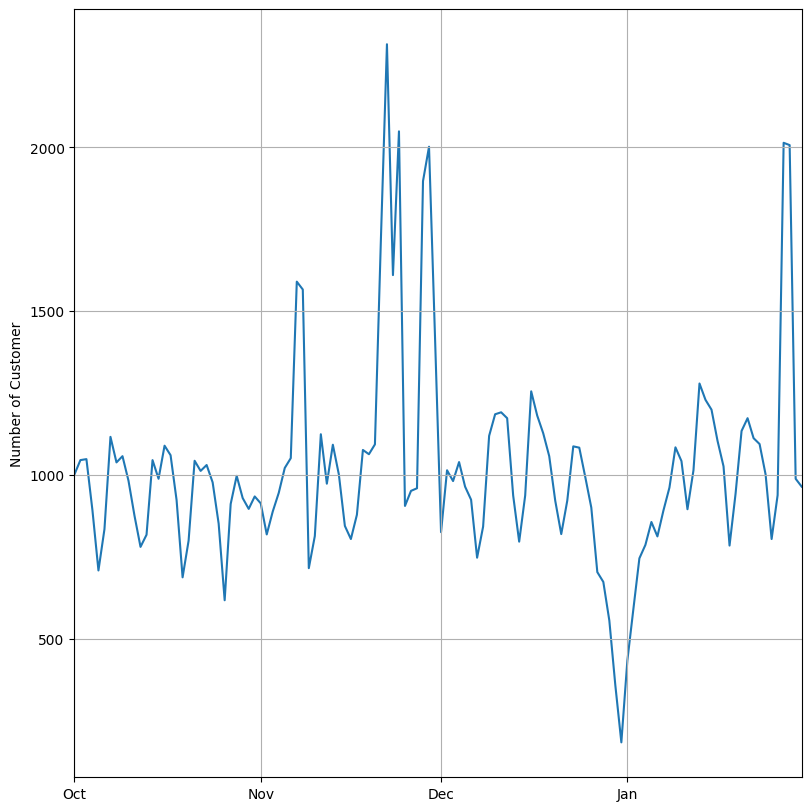

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), layout='constrained')

ax.plot(customerPerMonth.index.tolist(), customerPerMonth.values.tolist(), zorder=1)
ax.margins(x=0)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.grid(True, zorder=0)
ax.set_yticks([500, 1000, 1500, 2000], ['500', '1000', '1500', '2000'])
ax.set_ylabel('Number of Customer')

plt.show()

## Bar Chart

In [6]:
#table amount of soles per month
SolesPerMonth = data['price'].groupby([data['event_time'].dt.month.rename('month'), data['event_time'].dt.year.rename('year')]).sum()
SolesPerMonth = SolesPerMonth.sort_index(level=['year', 'month'])

### Chart

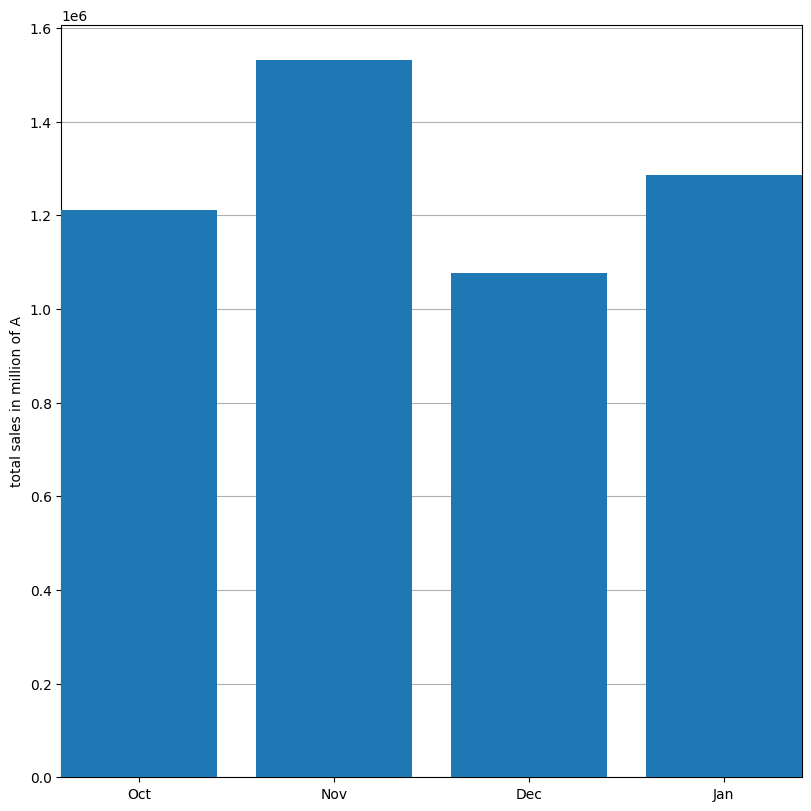

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), layout='constrained')

ax.bar(range(0, len(SolesPerMonth)), SolesPerMonth.values.tolist(), zorder=3)

ax.margins(x=0)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xticks(range(0, len(SolesPerMonth)), ['Oct', 'Nov', 'Dec', 'Jan'])
ax.set_ylabel('total sales in million of A')
ax.grid(axis='y', zorder=0)

plt.show()

## Stacked Chart

In [8]:
#table average spend per customer
AverageSpendPerCusto = data['price'].groupby([data['event_time'].dt.date.rename('At'), data['user_id'].rename('user')]).sum()
AverageSpendPerCusto = AverageSpendPerCusto.groupby('At').mean()

### Chart

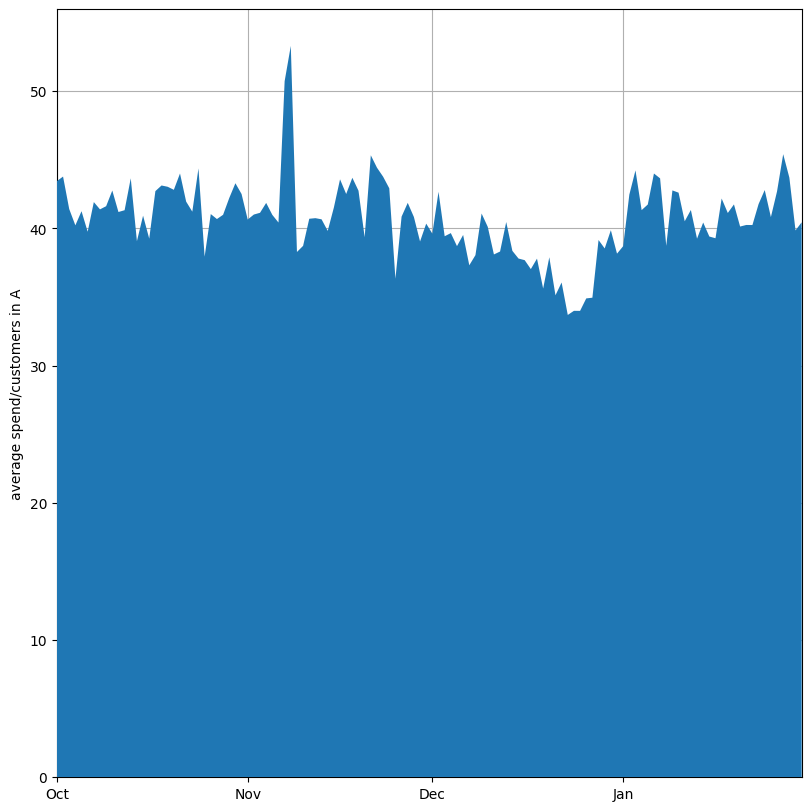

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), layout='constrained')

ax.stackplot(AverageSpendPerCusto.index.tolist(), AverageSpendPerCusto.values.tolist(), zorder=3)

ax.margins(x=0)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.grid(True, zorder=0)
ax.set_ylabel('average spend/customers in A')

plt.show()